In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

import re

#Import Count vectorizer and Classifiers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/combined_nba_soccer.csv')

In [3]:
data.head(2)

,title,created_utc,selftext,subreddit,author,media_only,permalink,target
0,If LeBron manage to lose to this Final and end...,1601223996,How will affect his legacy if he somehow were ...,nba,u87hi,False,/r/nba/comments/j0tyu3/if_lebron_manage_to_los...,0
1,[Ramirez]Anthony Davis shot 68.0% from mid-ran...,1598987437,NaN,nba,adonisgawd,False,/r/nba/comments/ikqojx/ramirezanthony_davis_sh...,0


In [4]:
X = data['title']
y = data['target']

In [5]:
y.value_counts(normalize=True)

1    0.500881
0    0.499119
Name: target, dtype: float64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=22)

In [7]:
X_train.shape

(75791,)

In [8]:
X_test.shape

(18948,)

In [9]:
y_train.shape

(75791,)

In [10]:
X_train.head()

71928    La Liga president Javier Tebas on Lionel Messi...
15993                                      For the chelsea
71698    Been seeing a lot of talk about how Melo is pr...
84501    TIKTOC Model saying she got paid $7000 to come...
38548    Arsenal win their 16th Community Shield agains...
Name: title, dtype: object

### Modeling

In [12]:
svc = SVC()
rf = RandomForestClassifier()

In [13]:
X_train

71928    La Liga president Javier Tebas on Lionel Messi...
15993                                      For the chelsea
71698    Been seeing a lot of talk about how Melo is pr...
84501    TIKTOC Model saying she got paid $7000 to come...
38548    Arsenal win their 16th Community Shield agains...
                               ...                        
2907     [Smith] I'm told the Orlando Magic have refuse...
52095    [Bechler] Messi wants to play for Manchester C...
42374    Realistic trade options to get Embiid to Miami...
77337    Post-Match Thread: Germany 3-3 Turkey [Friendl...
83625    Arsenal to sign Lille defender Gabriel Magalha...
Name: title, Length: 75791, dtype: object

In [14]:
#making pipes for each model (Logestic Regression, Naive Bayes, SVC, random forest)

In [16]:
cvect = CountVectorizer()

logr = LogisticRegression()
nb = MultinomialNB()
svc = SVC()
rf = RandomForestClassifier()

In [42]:
#Linear Regression params and pipe
pipe_logr = make_pipeline(cvect, logr)
params_logr = {
    'countvectorizer__min_df': [0],
    'countvectorizer__max_df': [0.5, 0.6],
    'countvectorizer__ngram_range': [(1,2)]
}

In [43]:
# Naive Bayes params and pipe
pipe_nb = make_pipeline(cvect, nb)
params_nb = {
    'countvectorizer__min_df': [0],
    'countvectorizer__max_df': [0.6, 0.6, 0.8],
    'countvectorizer__ngram_range': [(1,2)]
}

In [44]:
# SVC params and pipe
pipe_svc = make_pipeline(cvect, svc)
params_svc = {
#     'countvectorizer__min_df': [0],
    'countvectorizer__max_df': [0.5, 0.6],
    'countvectorizer__ngram_range': [(1,2)],
}

In [45]:
# Random Forest params and pipe
pipe_rf = make_pipeline(cvect, rf)
params_rf = {
#     'countvectorizer__min_df': [0],
    'countvectorizer__max_df': [0.5, 0.6],
    'countvectorizer__ngram_range': [(1,2)],
}

In [18]:
#making a function to automate data modeling with different models
def data_modeling (pipe, params):
    
    grid = GridSearchCV(pipe, params)
    grid.fit(X_train, y_train)
    
    print (grid.best_params_)
    print (f'Training data score: {grid.score(X_train, y_train)}')
    print (f'Tesing data score: {grid.score(X_test, y_test)}')
    
    return plot_confusion_matrix(grid, X_test, y_test, display_labels=['NBA', 'Soccer']);

#### Logestic Regression

{'countvectorizer__max_df': 0.5, 'countvectorizer__min_df': 0, 'countvectorizer__ngram_range': (1, 2)}
Training data score: 0.9979285139396499
Tesing data score: 0.967701076630779


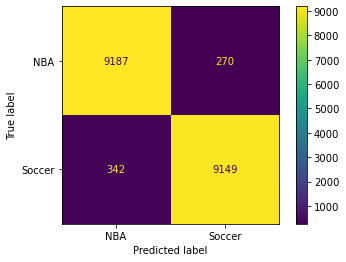

In [37]:
data_modeling(pipe_logr, params_logr)

#### Naive Bayes

{'countvectorizer__max_df': 0.6, 'countvectorizer__min_df': 0, 'countvectorizer__ngram_range': (1, 2)}
Training data score: 0.9886793946510799
Tesing data score: 0.9712898458940258


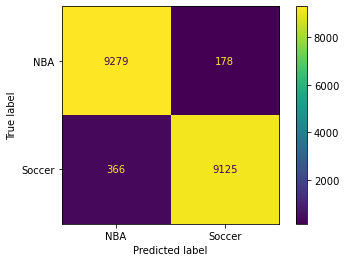

In [38]:
data_modeling(pipe_nb, params_nb)

#### Random Forest

{'countvectorizer__max_df': 0.6, 'countvectorizer__ngram_range': (1, 2)}
Training data score: 0.998509057803697
Tesing data score: 0.9608401942157484


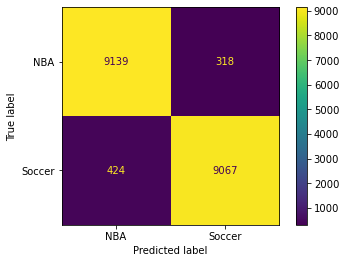

In [46]:
data_modeling(pipe_rf, params_rf)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94739 entries, 0 to 94738
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        94739 non-null  object
 1   created_utc  94739 non-null  int64 
 2   selftext     40505 non-null  object
 3   subreddit    94739 non-null  object
 4   author       94739 non-null  object
 5   media_only   94739 non-null  bool  
 6   permalink    94739 non-null  object
 7   target       94739 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 5.2+ MB
